# 神經網路實做

## 拿取加權指數資料

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


<AxesSubplot:xlabel='date'>

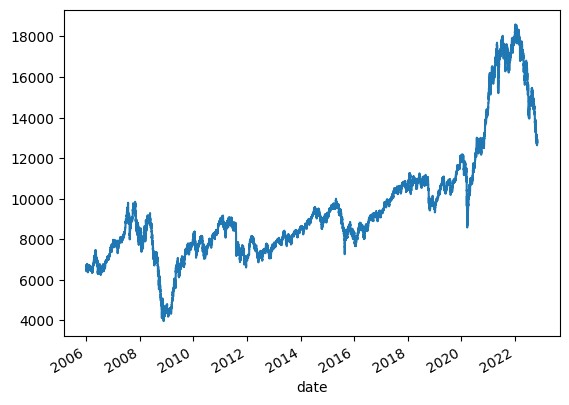

In [2]:
from finlab.data import Data
%matplotlib inline

data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]
twii.plot()

## 製作features

In [3]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) / twii,
})

feature_names = list(dataset.columns[:-1])

## 刪除NaN

In [4]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (78850, 43)
after dropping NaN (76922, 43)


## 神經網路Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset[feature_names])
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=feature_names)
dataset_scaled['return'] = dataset['return']
dataset_scaled.describe()

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return
count,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,...,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,7.692200e+04,76922.000000
mean,7.918793e-16,-2.990452e-16,-3.677514e-15,-2.235122e-15,-6.069864e-15,5.486657e-16,-2.376338e-17,4.648902e-18,-3.342679e-17,3.657077e-18,...,-8.786526e-16,4.044155e-17,1.219425e-16,-4.304283e-16,-8.690863e-16,1.130227e-15,3.557211e-16,-7.783079e-16,1.863198e-16,1.000118
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.008247
min,-4.372561e+00,-4.507351e+00,-4.768216e+00,-4.748049e+00,-4.713436e+00,-4.644398e+00,-8.927046e+00,-2.583806e+00,-2.685594e+00,-2.663697e+00,...,-5.481971e+00,-9.359846e+00,-7.121179e+00,-2.108235e+00,-2.008251e+00,-1.698717e+00,-1.612682e+00,-1.753367e+00,-1.799006e+00,0.924507
25%,-6.832392e-01,-6.818528e-01,-6.691187e-01,-6.647489e-01,-6.593222e-01,-6.506868e-01,-4.591774e-01,-6.396773e-01,-6.450067e-01,-6.289576e-01,...,-5.292456e-01,-4.627333e-01,-4.687857e-01,-7.425723e-01,-6.995059e-01,-7.507510e-01,-7.009880e-01,-6.854796e-01,-7.199188e-01,0.996984
50%,9.868801e-02,1.173351e-01,1.163029e-01,1.204872e-01,1.260445e-01,1.343648e-01,9.361904e-02,-1.314483e-02,-2.988686e-02,-6.923337e-03,...,1.205196e-01,7.985626e-02,8.648979e-02,-1.492521e-01,-2.294242e-01,-2.722471e-01,-2.516780e-01,-2.302717e-01,-2.124070e-01,1.000278
75%,7.234384e-01,7.146517e-01,6.883985e-01,6.936348e-01,6.925848e-01,6.906169e-01,5.752938e-01,6.553035e-01,6.711416e-01,6.028115e-01,...,5.827733e-01,5.653069e-01,5.757102e-01,5.917153e-01,4.661672e-01,5.029066e-01,4.914598e-01,4.957018e-01,5.872943e-01,1.003692
max,2.875346e+00,2.816448e+00,3.017217e+00,3.089766e+00,3.106958e+00,3.118196e+00,4.978359e+00,2.726890e+00,2.599248e+00,2.566149e+00,...,4.870826e+00,4.708728e+00,3.988839e+00,4.481067e+00,4.060341e+00,3.844740e+00,3.580498e+00,3.688155e+00,3.527788e+00,1.087726


## 神經網路 Model

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.0001,)

model.compile(loss='binary_crossentropy', optimizer=adam,)#metrics='accuracy',)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 24,601
Trainable params: 24,601
Non-trainable params: 0
_________________________________________________________________


## 神經網路訓練

In [9]:
dataset_scaled_train = dataset_scaled[:'2021']

checkpoint= './tmp/ACC_weights.hdf5' #如果不是hdf5他不會變成副檔名形式

get_best_model =  keras.callbacks.ModelCheckpoint(
    filepath=checkpoint,           #1. filename：模型保存在本地的路径
    monitor='accuracy',            #2. monitor：需要监视的值，val_accuracy、val_loss或者accuracy
    #verbose=0,                     #3. verbose：信息展示模式
    save_best_only=True,           #save_best_only：当设置为True时，表示当模型这次epoch的训练评判结果（monitor的监测值）比上一次保存训练时的结果有提升时才进行保存。
    #save_weights_only=False,       #6. save_weights_only：若设置为True，占用内存小（只保存模型权重），但下次想调用的话，需要搭建和训练时一样的网络。若设置为False，占用内存大（包括了模型结构和配置信息），下次调用可以直接载入，不需要再次搭建神经网络结构。
    #mode='auto',                   #5. mode：‘auto’，‘min’，‘max’之一，在save_best_only=True时决定性能最佳模型的评判准则，例如，当监测值为val_acc时，模式应为max，当检测值为val_loss时，模式应为min。在auto模式下，评价准则由被监测值的名字自动推断。
    #period=1                       #7. period：填写 int 值，如果填写 period=3，指模型每训练3个epoch，进行保存一次。
)

#(filepath=checkpoint, monitor="accuracy")

history = model.fit(dataset_scaled_train[feature_names],
                    dataset_scaled_train['return'] > 1,
                    batch_size=100,
                    epochs=30,
                    validation_split=0.1,
                    callbacks=[get_best_model]
                   )
          


Epoch 1/30
659/659 [==============================] - 1s 2ms/step - loss: 0.5656 - val_loss: 0.8183
Epoch 2/30
659/659 [==============================] - 1s 2ms/step - loss: 0.5625 - val_loss: 0.8146
Epoch 3/30
659/659 [==============================] - 2s 2ms/step - loss: 0.5584 - val_loss: 0.8332
Epoch 4/30
659/659 [==============================] - 2s 2ms/step - loss: 0.5556 - val_loss: 0.8498
Epoch 5/30
659/659 [==============================] - 1s 2ms/step - loss: 0.5529 - val_loss: 0.8480
Epoch 6/30
659/659 [==============================] - 2s 2ms/step - loss: 0.5488 - val_loss: 0.8557
Epoch 7/30
659/659 [==============================] - 1s 2ms/step - loss: 0.5452 - val_loss: 0.8951
Epoch 8/30
659/659 [==============================] - 1s 2ms/step - loss: 0.5419 - val_loss: 0.8648
Epoch 9/30
659/659 [==============================] - 2s 2ms/step - loss: 0.5393 - val_loss: 0.8781
Epoch 10/30
659/659 [==============================] - 2s 2ms/step - loss: 0.5356 - val_loss: 0.9267

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# build a classifier
clf = RandomForestRegressor(n_estimators=100)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}
# run randomized search
n_iter_search = 20
rs = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
rs.fit(dataset_scaled_train[feature_names], dataset_scaled_train['return'] > 1)

In [11]:
model.load_weights(filepath=checkpoint,)

Text(0, 0.5, 'Value')

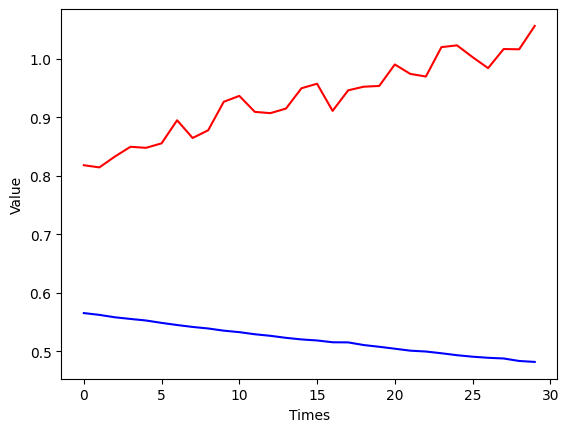

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history ['val_loss'],color='red')
plt.xlabel('Times')                    #2
plt.ylabel('Value')            #3

## 回測

In [ ]:
ey = model.predict(dataset_scaled[feature_names])
ey = pd.Series(ey.swapaxes(0, 1)[0], index=dataset.index)

In [ ]:
ey.plot()

In [ ]:
eq = twii[dataset.index]
gain = (eq.shift(-1) - eq)

signal = (ey > ey.quantile(0.75)).rolling(10).sum() > 0

eq = (gain[signal]['2022':]).cumsum()
eq.plot()

In [ ]:
(signal.astype(int).diff().abs().fillna(0) * 3)['2022':].sum()